# 🔥 Общие вопросы 

- Если возникают вопросы:
    - Google 
    - У друга
    - Google 
    - Написать или позвонить мне
        - email: letlevin@gmail.com
        - telegram: @andreylev
        - по телефону. Номер указан у письме
        
- Про оценки:
    - Каждое задание имеет свою клетку, заданием считается один task. За один урок у нас несколько заданий.
    - Выполняете - получаете 5
    - Через 2 недели после задания в пустой клетке появляется оценка 2 для стимулирования процесса.
    - Выполняете -> оценка 2 изменяется на другую
    - Выполнение задач лучше не сильно затягивать. Потом у меня не будет много времени на их проверку.
- Все решения нужно размещать у себя в репозиторий (Инструкция с этим была в уроке номер 2). В качестве ответа нужно прислать ссылку на ваш открытый репозиторий.
- Математические модели 

# 🙊 Про короновирус

Неделю назад было анонсировано аналитическое задание по предсказанию динамики развития короновируса.

Что нужно сделать?

- Открыть ссылку https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
- Изучить данные
- Попробовать предсказать основные показатели развития ситуации к 4 марта.
- Сделать краткое обоснование полученных значений.
- До 19 марта в создать файл у себя в репозиторие, в котором разместить
    - Указать вероятные показатели
    - Написать краткое обоснование полученных значений
    
- Итоги подведем 4 марта!
    



# 👽 Тема 4. Computer vision

https://en.wikipedia.org/wiki/Computer_vision

![](https://miro.medium.com/max/1024/1*URl8Xawv6biXul2XoIUwyQ.jpeg)

# Функции 

![](https://www.meccanismocomplesso.org/wp-content/uploads/2016/12/opencv-filter-image-theory-eng.jpg)

![](https://habrastorage.org/webt/xh/7m/8n/xh7m8nokzhgfqixb00fnwcmkthm.jpeg)

![](https://habrastorage.org/getpro/habr/post_images/4f8/312/709/4f831270939c4f685405283f4286e867.gif)

# OpenCV

https://ru.wikipedia.org/wiki/OpenCV

![](https://www.luisllamas.es/wp-content/uploads/2014/07/opencv-ubuntu.png)


In [2]:
# Здесь НЕ меняем Магия

import numpy as np
import urllib.request
import cv2
from matplotlib import pyplot as plt


# Функция показа изображения
def show_image(img, title = 'Image title', size = 8):
    plt.figure(figsize=((size, 8)))

    #img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    abs_64f = np.absolute(img)
    img = np.uint8(abs_64f)
    #img.convertTo(img, cv2.CV_8UC3);
    imt = cv2.convertScaleAbs(img)
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.clf()
    

# Функция получения изображения по URL из интернета
def get_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    # return the image
    return image



# Функция уменбшения размера изображения
def resize_image(img, max_height = 300, max_width = 300):
    height, width = img.shape[:2]

    if max_height < height or max_width < width:

        scaling_factor = max_height / float(height)
        if max_width/float(width) < scaling_factor:
            scaling_factor = max_width / float(width)

        img = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
    
    return img



In [25]:
### Получение изображения из интернета

# Адрес изображения в интернете
url2 = 'https://www.msu.ru/img/main/msu_eng2.jpg'
url3 = 'https://www.pyimagesearch.com/wp-content/uploads/2014/05/matplotlib-rgb-fixed.jpg'

url4 = 'https://storge.pic2.me/c/1360x800/947/569283b4598f7.jpg'

url5 = 'https://images.pexels.com/photos/1671373/pexels-photo-1671373.jpeg'

url_kote = 'https://w-dog.ru/wallpapers/5/19/477214995243544/kot-kote-polosatyj-vetka-yagody.jpg'

url_arrows = 'https://www.meccanismocomplesso.org/wp-content/uploads/2016/12/blackandwhite.jpg'

url_arbuz = 'https://n1s1.hsmedia.ru/59/15/0b/59150bea17584ab2305e872ae7350cb6/1000x745_0xac120003_6979955351562633140.jpg'

url_kisa = 'https://s0.rbk.ru/v6_top_pics/resized/1180xH/media/img/7/06/755581025099067.jpeg'


# Полуаем изображение
cat0 = get_image(url_kote)
arrows0 = get_image(url_arrows)


arbuz = get_image(url_arbuz)
kisa = get_image (url_kisa)



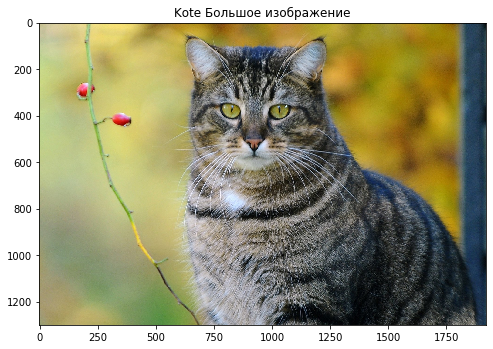

<Figure size 432x288 with 0 Axes>

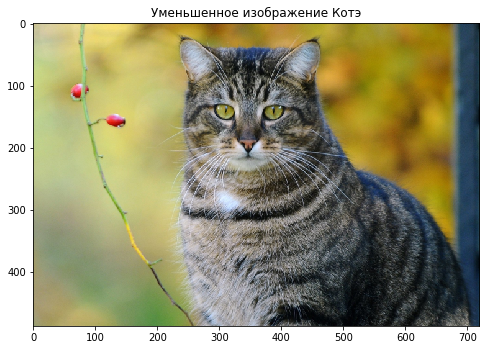

<Figure size 432x288 with 0 Axes>

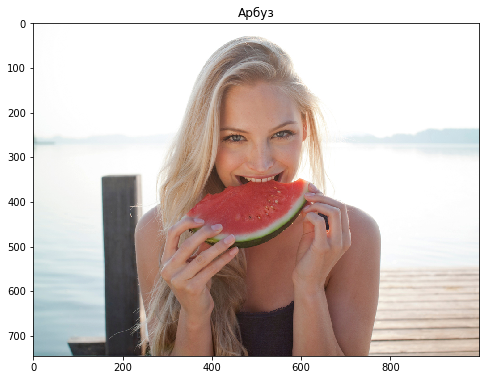

<Figure size 432x288 with 0 Axes>

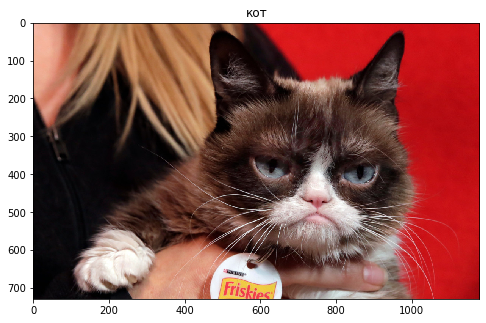

<Figure size 432x288 with 0 Axes>

In [27]:
# Базовые функции работы с изображенеим

# Показываем
show_image(cat0, 'Kote Большое изображение')

# Resize. Новое Уменьшенное изображение
cat = resize_image(cat0, 720, 720)

# Показываем
show_image(cat, 'Уменьшенное изображение Котэ')


show_image(arbuz, 'Арбуз')
show_image(kisa, 'кот')




### OpenCV. Changing Colorspaces

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

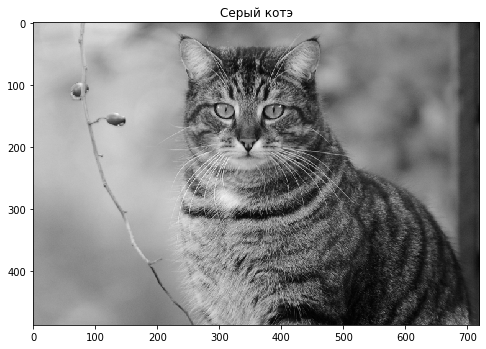

<Figure size 432x288 with 0 Axes>

In [28]:
# Изменение цвета

gray_cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)

# Показываем
show_image(gray_cat, 'Серый котэ')



![](https://www.pyimagesearch.com/wp-content/uploads/2016/01/shape_detection_results.gif)

# Границы 

![](https://www.meccanismocomplesso.org/wp-content/uploads/2016/12/opencv-filter-image-theory-2.jpg)



## Градиент

https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82

Градиент  — вектор, своим направлением указывающий направление наибольшего возрастания некоторой величины ${\displaystyle \varphi ,}\varphi$ , значение которой меняется от одной точки пространства к другой (скалярного поля), а по величине (модулю) равный скорости роста этой величины в этом направлении


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7861ec6a9a2d231fb5e69cf38b0b14eaa0e9ecb3)   

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/530d61ecf042c2de0c0915e67c1a99639daba62a)
 
    
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4e37c33ac72763986717bf1ac1d7d9c3fd39d3e6)
    

# Image Gradients

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
    
    

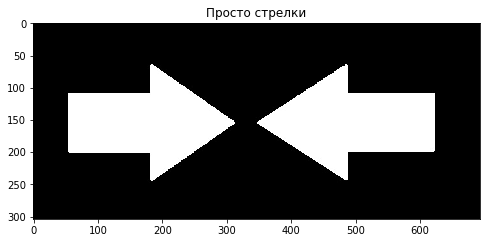

<Figure size 432x288 with 0 Axes>

In [80]:
# Рассмотрим стрелки для простоты

arrows0 = get_image(url_arrows)
arrows = resize_image(arrows0, 720, 720)

# Показываем
show_image(arrows, 'Просто стрелки')


# Производная функция от изображения $\frac{\partial f}{\partial x}$

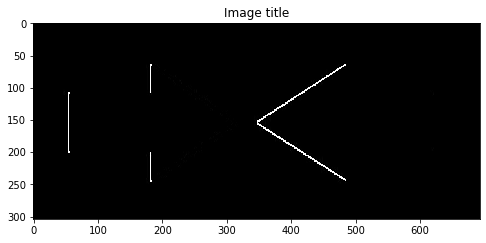

<Figure size 432x288 with 0 Axes>

In [102]:

# Первая производная по модулю
diff_x_arrows = cv2.Sobel(arrows,cv2.CV_8U,1,0)
show_image(diff_x_arrows)



 # По модулю частная производная функция от изображения по $x$ : $ \big| \frac{\partial f}{\partial x} \big|$ 

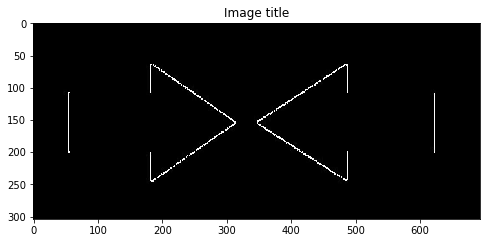

<Figure size 432x288 with 0 Axes>

In [103]:

# Первая производная по модулю
diff_x_arrows = cv2.Sobel(arrows,cv2.CV_64F,1,0)
show_image(diff_x_arrows)




 # По модулю частная производная функция от изображения  по $y$ :  $ \big| \frac{\partial f}{\partial y} \big|$ 

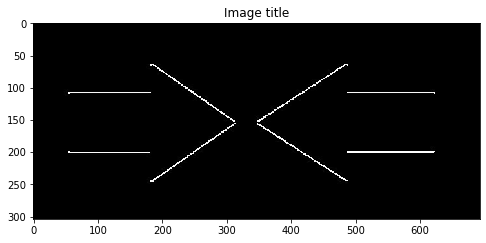

<Figure size 432x288 with 0 Axes>

In [104]:

# Первая производная по модулю
diff_y_arrows = cv2.Sobel(arrows, cv2.CV_64F, 0,1)
show_image(diff_y_arrows)




# А если совместить?


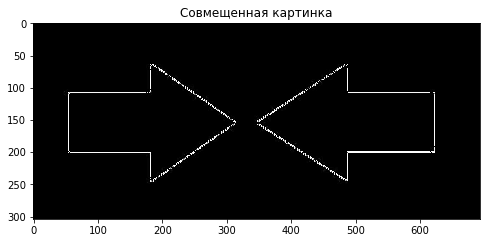

<Figure size 432x288 with 0 Axes>

In [105]:
diff_combined_arrows = cv2.bitwise_or(diff_x_arrows, diff_y_arrows)
show_image(diff_combined_arrows, 'Совмещенная картинка')


# Как там поживает котэ?

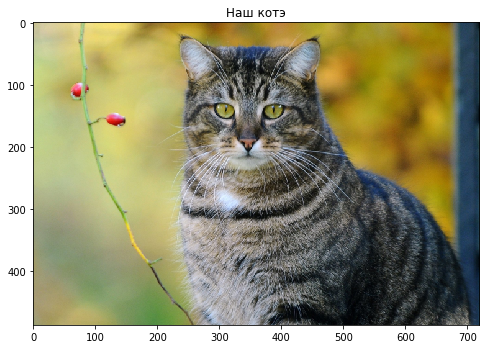

<Figure size 432x288 with 0 Axes>

In [111]:
show_image(cat, 'Наш котэ')


### Дифференцируем кота

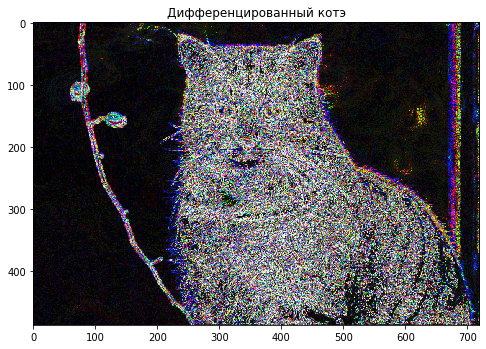

<Figure size 432x288 with 0 Axes>

In [8]:

diff_x_cat = cv2.Sobel(cat, cv2.CV_64F, 1,0)
diff_y_cat = cv2.Sobel(cat, cv2.CV_64F, 0,1)
combined_diff_cat = cv2.bitwise_or(diff_x_cat, diff_y_cat)

show_image(combined_diff_cat, 'Дифференцированный котэ')

### Task 3.1
Найти в интернете интересное изображение для Вас. 
Взять первую, вторую, 3-ую производную от Котэ и Вашего изображения


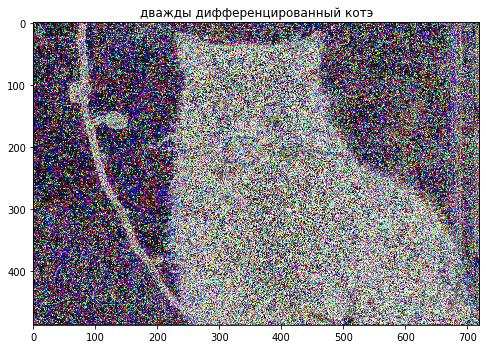

<Figure size 432x288 with 0 Axes>

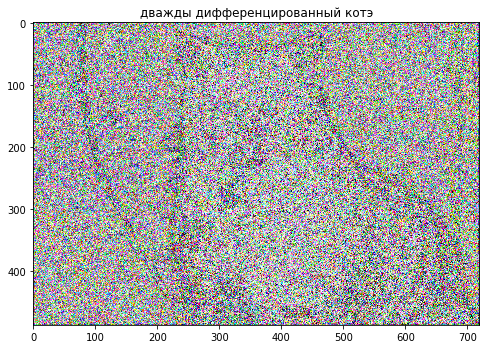

<Figure size 432x288 with 0 Axes>

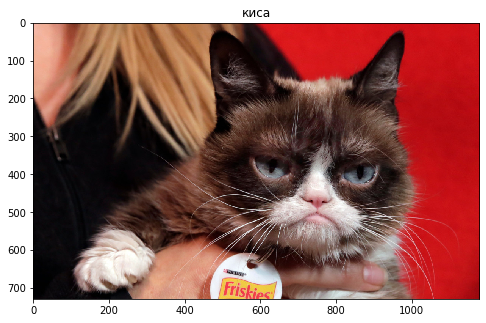

<Figure size 432x288 with 0 Axes>

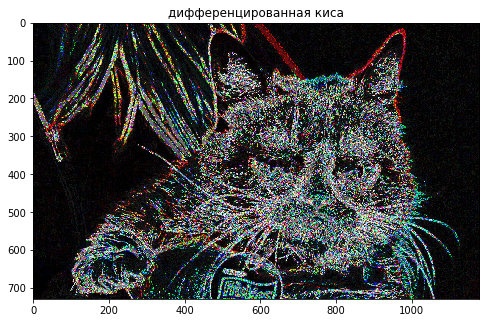

<Figure size 432x288 with 0 Axes>

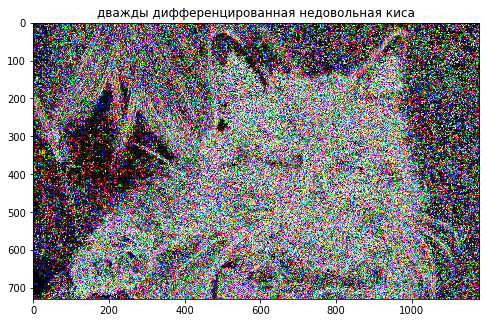

<Figure size 432x288 with 0 Axes>

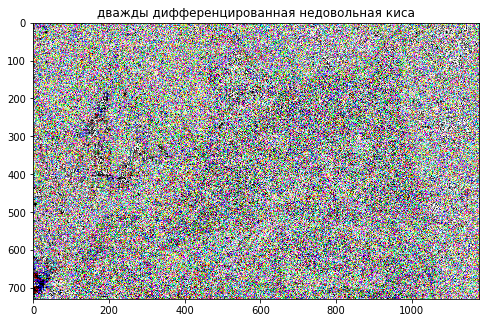

<Figure size 432x288 with 0 Axes>

In [31]:
# Task 3.1. Solution





#2-я производная, это просто производная производной
diff2_x_cat = cv2.Sobel(diff_x_cat, cv2.CV_64F, 1,0)
diff2_y_cat = cv2.Sobel(diff_y_cat, cv2.CV_64F, 0,1)
combined_diff2_cat = cv2.bitwise_or(diff2_x_cat, diff2_y_cat)


show_image(combined_diff2_cat, "дважды дифференцированный котэ")


#3-я производная, это просто производная производной производной
diff3_x_cat = cv2.Sobel(diff2_x_cat, cv2.CV_64F, 1,0)
diff3_y_cat = cv2.Sobel(diff2_y_cat, cv2.CV_64F, 0,1)
combined_diff3_cat = cv2.bitwise_or(diff3_x_cat, diff3_y_cat)


show_image(combined_diff3_cat, "трижды дифференцированный котэ")


show_image (kisa, 'киса')

diff_x_kisa = cv2.Sobel(kisa, cv2.CV_64F, 1, 0)
diff_y_kisa = cv2.Sobel(kisa, cv2.CV_64F, 0, 1)
combined_diff_kisa = cv2.bitwise_or(diff_x_kisa, diff_y_kisa)

show_image(combined_diff_kisa, "дифференцированная киса")


diff2_x_kisa = cv2.Sobel(diff_x_kisa, cv2.CV_64F, 1,0)
diff2_y_kisa = cv2.Sobel(diff_y_kisa, cv2.CV_64F, 0,1)
combined_diff2_kisa = cv2.bitwise_or(diff2_x_kisa, diff2_y_kisa)


show_image(combined_diff2_kisa, "дважды дифференцированная недовольная киса")


diff3_x_kisa = cv2.Sobel(diff2_x_kisa, cv2.CV_64F, 1,0)
diff3_y_kisa = cv2.Sobel(diff2_y_kisa, cv2.CV_64F, 0,1)
combined_diff3_kisa = cv2.bitwise_or(diff3_x_kisa, diff3_y_kisa)


show_image(combined_diff3_kisa, "дважды дифференцированная недовольная киса")



































# Из чего состоит наш котэ? 

In [116]:
# Содержание первых 10 строк нашего котэ 

print(diff_combined_cat[:10])

[[[   0.    0.    0.]
  [   2.    0.   -8.]
  [   6.    2.   -6.]
  ...
  [ -60.  -42.  -34.]
  [ -38.  -30.  -26.]
  [   0.    0.    0.]]

 [[   2.   -2.   -8.]
  [   1.   nan   -8.]
  [  -4.   -6.  -11.]
  ...
  [-124.  -44.  -68.]
  [  nan  -64.  -31.]
  [  -4.   -6.   -6.]]

 [[   2.   -2.  -12.]
  [   4.   -2.  -30.]
  [   7.    0.  -30.]
  ...
  [-264.   nan  -34.]
  [  nan -108.  -31.]
  [  -4.  -10.   -8.]]

 ...

 [[   4.    4.    2.]
  [  -7.    6.    7.]
  [ -22.   14.   10.]
  ...
  [-464. -344.  -13.]
  [-244.  -31.   28.]
  [  38.   34.   18.]]

 [[  10.   10.   10.]
  [  14.   13.   13.]
  [  nan   28.   23.]
  ...
  [ -36.  -31.  -14.]
  [ -61. -168.   27.]
  [  52.   42.   20.]]

 [[   2.    2.    2.]
  [  22.   13.   13.]
  [  14.   24.   30.]
  ...
  [-504. -496.  -31.]
  [ 122.  -46.   28.]
  [  54.   46.   22.]]]


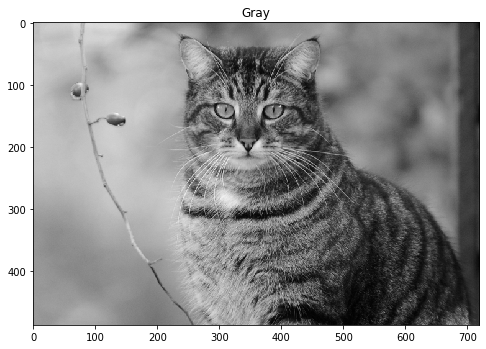

<Figure size 432x288 with 0 Axes>

In [118]:
gray_cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
show_image(gray_cat, 'Gray')

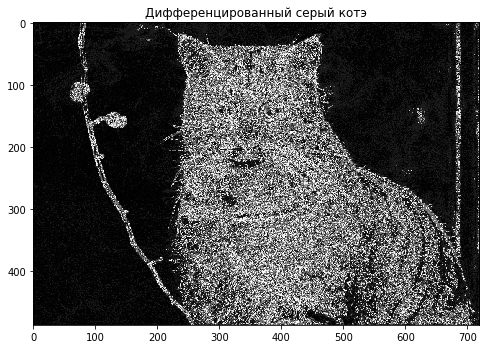

<Figure size 432x288 with 0 Axes>

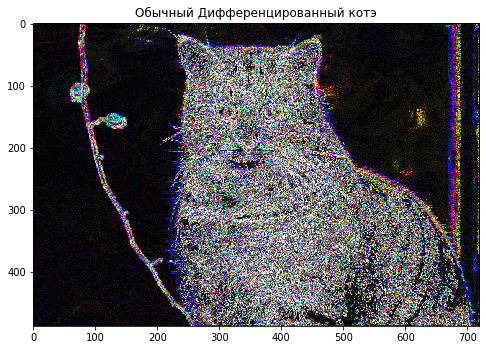

<Figure size 432x288 with 0 Axes>

In [126]:
diff_x_gray_cat = cv2.Sobel(gray_cat, cv2.CV_64F, 1,0)
diff_y_gray_cat = cv2.Sobel(gray_cat, cv2.CV_64F, 0,1)
combined_diff_gray_cat = cv2.bitwise_or(diff_x_gray_cat, diff_y_gray_cat)

show_image(combined_diff_gray_cat, 'Дифференцированный серый котэ')
show_image(combined_diff_cat, 'Обычный Дифференцированный котэ')

# Важен ли цвет кота при дифференцировании? 😃


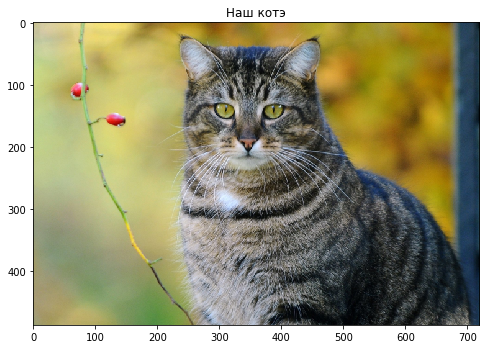

<Figure size 432x288 with 0 Axes>

In [127]:
show_image(cat, 'Наш котэ')

# Как улучшить ситуацию распознования границ?
## Вернемся к срелочкам. 

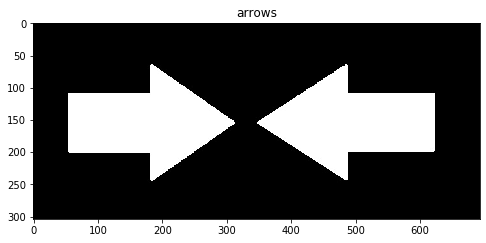

<Figure size 432x288 with 0 Axes>

In [140]:

grey = cv2.cvtColor(arrows, cv2.COLOR_BGR2GRAY)
show_image(grey, 'arrows')


# Image Blurring (Image Smoothing)

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/median.jpg)

### Существует несколько основных методов размытия 

1. Averaging
2. Gaussian Filtering
3. Median Filtering
4. Bilateral Filtering

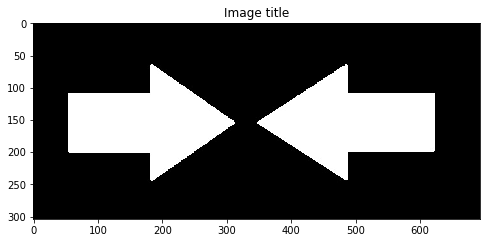

<Figure size 432x288 with 0 Axes>

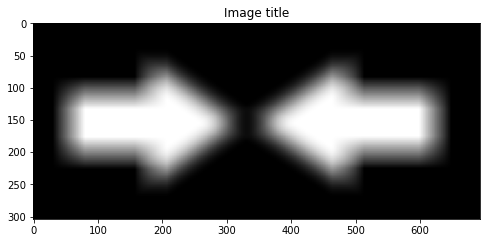

<Figure size 432x288 with 0 Axes>

In [205]:
show_image(arrows)
blur_arrows = cv2.blur(arrows,(50,50),0)
show_image(blur_arrows)

# Немного размоем кота по среднему

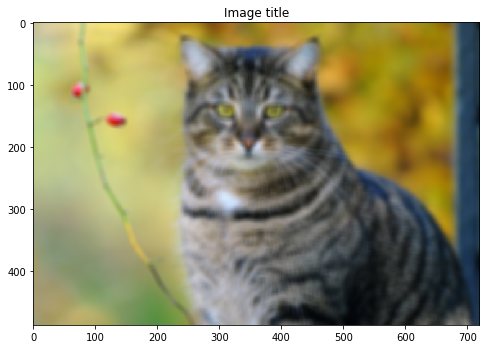

<Figure size 432x288 with 0 Axes>

In [186]:
blur_cat = cv2.blur(cat,(10,10),0)
show_image(blur_cat)

# А теперь проверим, помогло ли это!



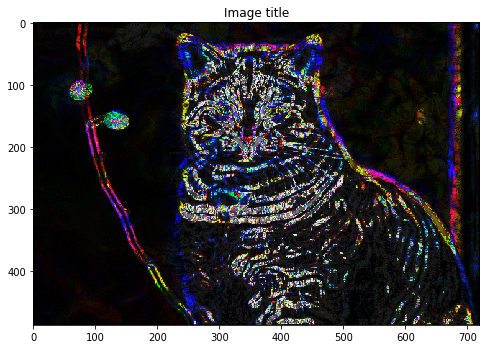

<Figure size 432x288 with 0 Axes>

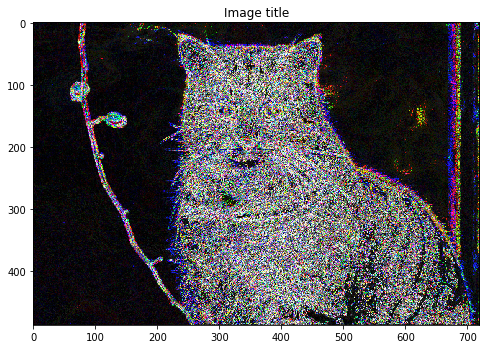

<Figure size 432x288 with 0 Axes>

In [206]:

diff_x_blur_cat = cv2.Sobel(blur_cat, cv2.CV_64F, 1,0)
diff_y_blur_cat = cv2.Sobel(blur_cat, cv2.CV_64F, 0,1)
combined_diff_blur_cat = cv2.bitwise_or(diff_x_blur_cat, diff_y_blur_cat)
show_image(combined_diff_blur_cat)

show_image(combined_diff_cat)


## Task 3.2.  "Использование другого метода сглаживания"

- A. Выбрать Ваш метод сглаживания из списка методов по формуле $your_method = 2 +  (your__n)mod3$ 
    https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

    - 1 . Averaging
    - 2 . Gaussian Filtering
    - 3 . Median Filtering
    - 4 . Bilateral Filtering
- B. Разобраться в этом методе сглаживания

- С. Применить этод метод сглаживания для Вашего выбранного изображения.

- D. Сравнить этот метод сглаживания с (Averaging). Преимущества и недостатки. Написть в ответе.

- E. Используя этот метод найти границы для Вашего изображения.



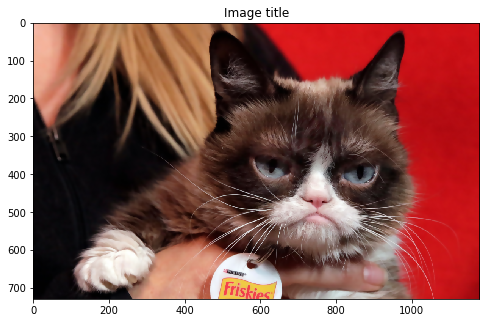

<Figure size 432x288 with 0 Axes>

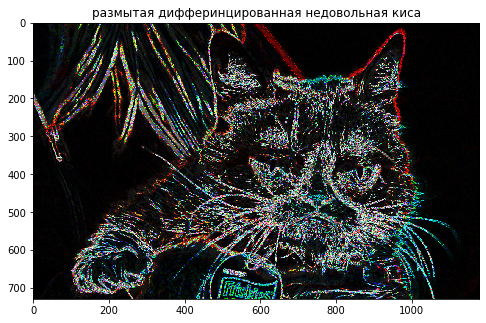

<Figure size 432x288 with 0 Axes>

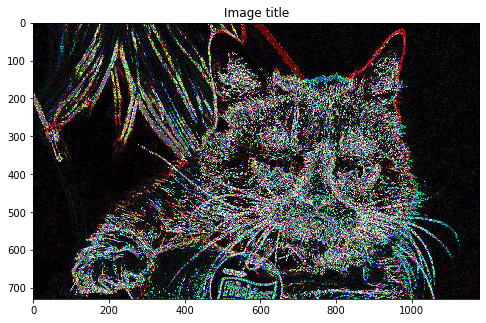

Самое главное отличие этого способа размытия в том, что он выделяет границы. Тогда, как Averaging равномерно размывает картинку, Bilateral присваивает коэффицент размытия, в зависимости от того, насколько пиксель отличается от соседей


<Figure size 432x288 with 0 Axes>

In [34]:
# Task 3.2. Solution


blur_kisa = cv2.bilateralFilter(kisa,9,35,75)

show_image(blur_kisa)


diff_x_blur_kisa = cv2.Sobel(blur_kisa, cv2.CV_64F, 1,0)
diff_y_blur_kisa = cv2.Sobel(blur_kisa, cv2.CV_64F, 0,1)
combined_diff_blur_kisa = cv2.bitwise_or(diff_x_blur_kisa, diff_y_blur_kisa)
show_image(combined_diff_blur_kisa, "размытая дифферинцированная недовольная киса")

show_image(combined_diff_kisa)


print("Самое главное отличие этого способа размытия в том, что он выделяет границы. Тогда, как Averaging равномерно размывает картинку, Bilateral присваивает коэффицент размытия, в зависимости от того, насколько пиксель отличается от соседей")






















# Метод Кэнни.

На уроке не успели разобрали. Но важный и интересный метод.


https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%9A%D1%8D%D0%BD%D0%BD%D0%B8
    
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html



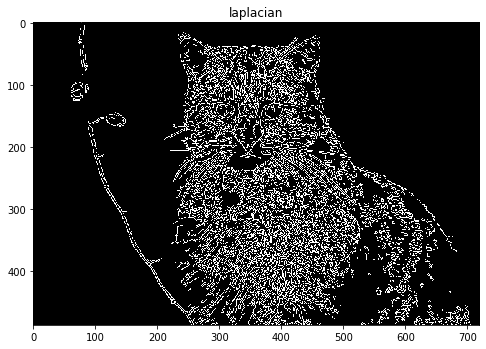

<Figure size 432x288 with 0 Axes>

In [195]:
canny_cat = cv2.Canny(cat,100,200)

show_image(canny_cat, 'canny_cat')


## Task 3.3 

- Изучить метод Кэнни самостоятельно.
- Разобрать разные параметры этого метода
- Прмиенить это метод для Вашего изображения с разными параметрами.


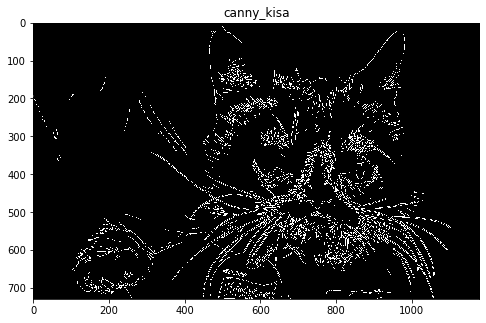

<Figure size 432x288 with 0 Axes>

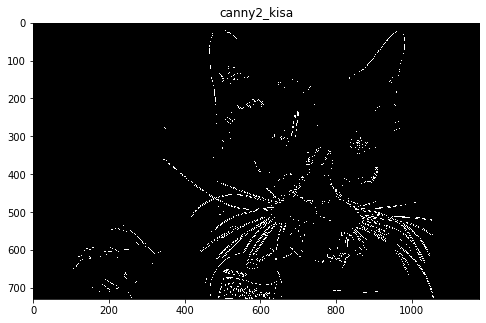

<Figure size 432x288 with 0 Axes>

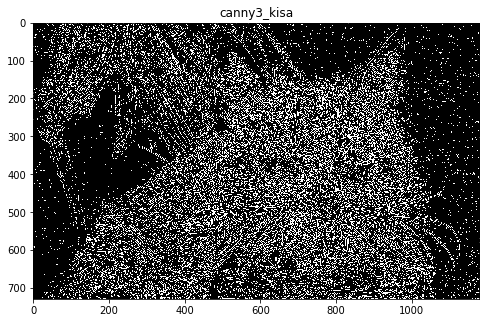

<Figure size 432x288 with 0 Axes>

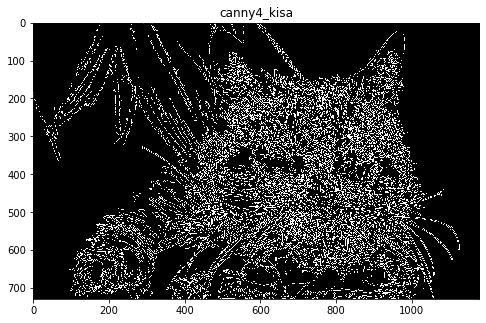

<Figure size 432x288 with 0 Axes>

In [37]:
# Task 4.3. Solution.


canny_kisa = cv2.Canny(kisa,100,200)

show_image(canny_kisa, 'canny_kisa')


canny2_kisa = cv2.Canny(kisa,300,250)

show_image(canny2_kisa, 'canny2_kisa')

canny3_kisa = cv2.Canny(kisa, 20, 20)

show_image(canny3_kisa, 'canny3_kisa')

canny4_kisa = cv2.Canny(kisa, 20, 80)
show_image(canny4_kisa, 'canny4_kisa')





















## Task 4.4. Задача с параметрами
Используя метод Интерактивных движков из урока 1
https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html# , 
    
нужно сделать также для интерактивного подбора параметров сглаживания и параметров выделения гарниц 
для Вашего изображения.

Т.е. Несколько параметров возможно менять ползунками, а результат применения можно сразу же видеть на фото.

Таким образом

- нужно изучить то, как влияют различные параметры на точность нахождения границ
- выбрать лучшие параметры для Вашего изображения


In [60]:
# Task 4.4 Solution

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets




def f(a,b,c):
    blur_kisa = cv2.bilateralFilter(kisa,a,b,c)
    diff_x_blur_kisa = cv2.Sobel(blur_kisa, cv2.CV_64F, 1,0)
    diff_y_blur_kisa = cv2.Sobel(blur_kisa, cv2.CV_64F, 0,1)
    combined_diff_blur_kisa = cv2.bitwise_or(diff_x_blur_kisa, diff_y_blur_kisa)
    show_image(combined_diff_blur_kisa, "размытая дифферинцированная недовольная киса")
    return blur_kisa

interact(f, a = 20, b = 150, c = 150)









































interactive(children=(IntSlider(value=20, description='a', max=60, min=-20), IntSlider(value=150, description=…

<function __main__.f(a, b, c)>